In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

souce de données

In [5]:
amazon = yf.download("AMZN", start="2020-01-01", end="2026-01-01")
print(amazon.head())
amazon = amazon.dropna()


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000


Nettoyer les données

In [ ]:
import pandas as pd
import seaborn as sns

amazon.isnull().sum()
amazon = amazon.drop_duplicates()
amazon=amazon.dropna()
amazon.head()


Évolution du cours de l’action

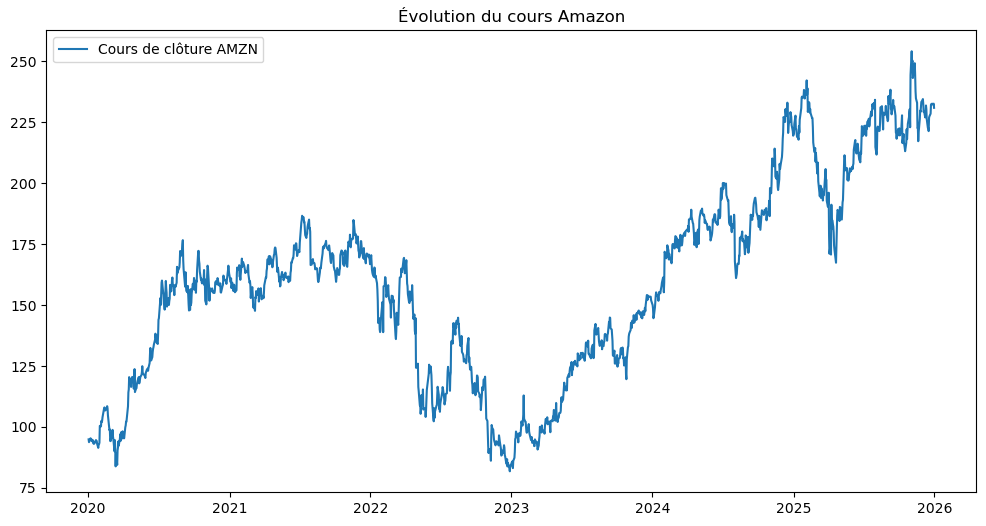

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(amazon['Close'], label="Cours de clôture AMZN")
plt.title("Évolution du cours Amazon")
plt.legend()
plt.show()

Volume de transaction

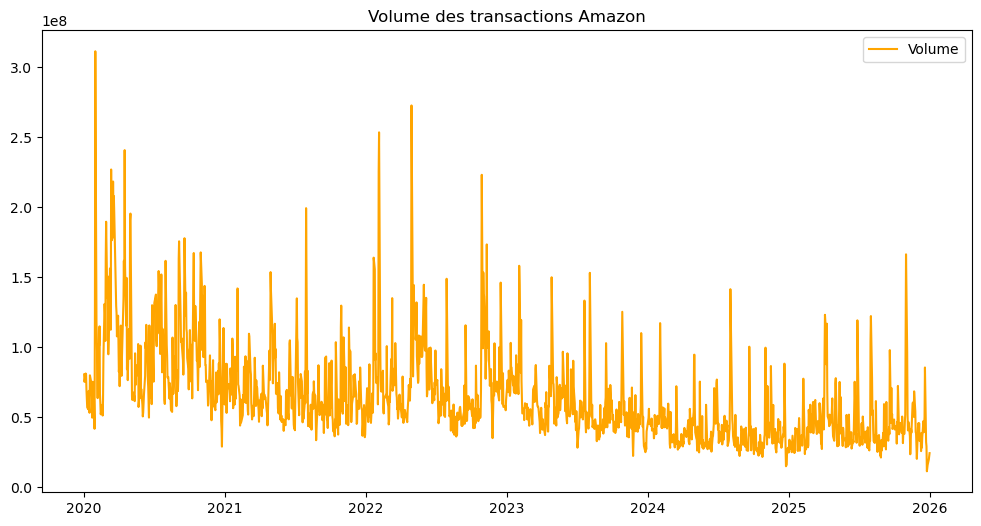

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(amazon['Volume'], color="orange", label="Volume")
plt.title("Volume des transactions Amazon")
plt.legend()
plt.show()

Moyenne mobile

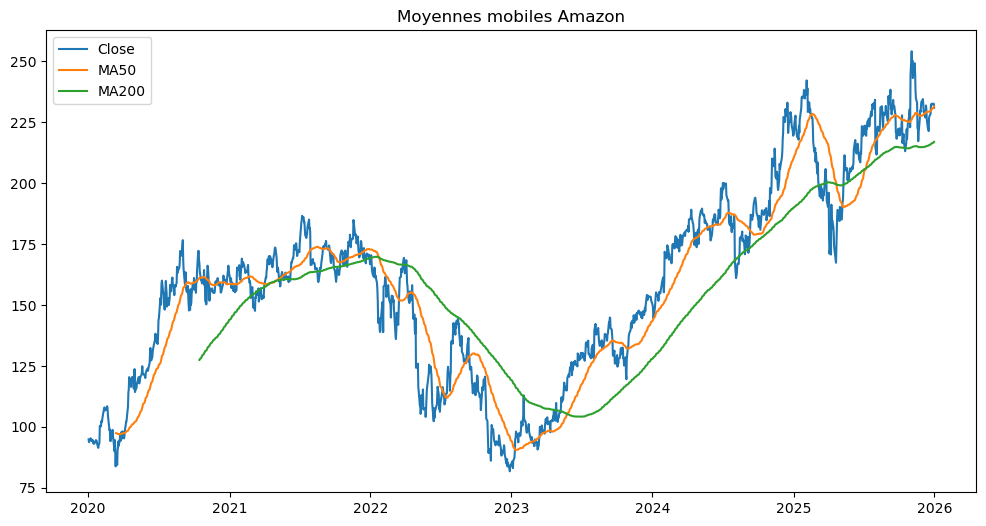

In [ ]:
amazon['MA50'] = amazon['Close'].rolling(50).mean()
amazon['MA200'] = amazon['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(amazon['Close'], label="Close")
plt.plot(amazon['MA50'], label="MA50")
plt.plot(amazon['MA200'], label="MA200")
plt.title("Moyennes mobiles Amazon")
plt.legend()
plt.show()

Rendement quotidien

In [ ]:
amazon['Daily Return'] = amazon['Close'].pct_change()
print(amazon['Daily Return'].mean())

0.0008423857721316283


Ajout de la colonne « Tendance »

In [ ]:

amazon['Tendance'] = amazon['Daily Return'].apply(lambda x: 'Hausse' if x > 0 else 'Baisse')

Visualiser la fréquence

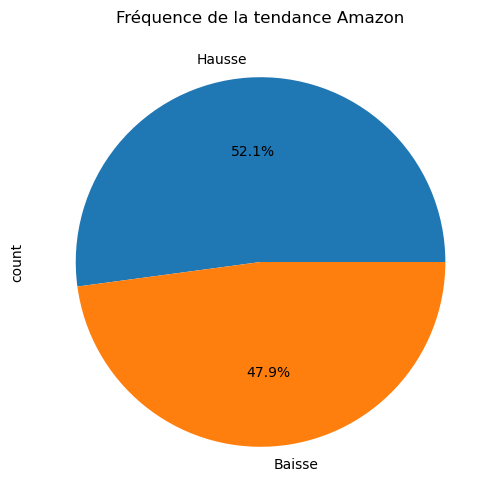

In [ ]:

amazon['Tendance'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Fréquence de la tendance Amazon")
plt.show()

Corrélation entre plusieurs actions

In [ ]:

tickers = ["AMZN", "AAPL", "MSFT", "GOOGL"]
data = yf.download(tickers, start="2020-01-01", end="2026-01-01")['Close']

returns = data.pct_change()
corr = returns.corr()

print(corr)

[*********************100%***********************]  4 of 4 completed

Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    1.000000  0.588252  0.623103  0.709151
AMZN    0.588252  1.000000  0.630264  0.664952
GOOGL   0.623103  0.630264  1.000000  0.700144
MSFT    0.709151  0.664952  0.700144  1.000000
